<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/Linear_Regression_Optimizing%20Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Self-Study Colab Activity 7.2: Defining, Computing, and Optimizing Loss

**Expected Time = 60 Minutes**


This activity focuses on computing and minimizing the L2 loss for different values of theta and identifying the theta that minimizes the L2 loss.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### The Dataset

The geyser data from seaborn is loaded below.  You are to  build a model using the waiting time to predict the geyser explosion duration.

Note that this model will not have an intercept term.  

In [2]:
geyser = sns.load_dataset('geyser')

In [3]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


[Back to top](#Index:)

## Problem 1

### Creating an array of $\theta$'s


Below, create an array of 100 equally spaced values between -1 and 1.  Use the `np.linspace` method demonstrated in the lectures and assigned your answer as a numpy array to `thetas` below.

In [57]:
thetas = np.linspace(-0.5, 0.5, 100)

# Answer check
print(type(thetas))
print(thetas.shape)

<class 'numpy.ndarray'>
(100,)


[Back to top](#Index:)

## Problem 2

### The Model



In this assignment, our model takes the form:

$$\text{duration} = \text{waiting} \times \theta$$

Multiply the values in the `waiting` column of the `geyser` dataset by `0.8` to create a prediction for the case of $\theta = 0.8$. Assign them as a Series to the variable `prediction` below.

In [58]:
prediction = geyser['waiting'] * 0.8
#print(geyser['waiting'])
#prediction
# Answer check
print(type(prediction))
print(prediction.shape)

<class 'pandas.core.series.Series'>
(272,)


[Back to top](#Index:)

## Problem 3

### Determining Mean Squared Error




Use the `mean_squared_error` function to calculate the MSE between the `duration` column of the `geyser` DataFrame and the `0.8*geyser['waiting']` data.

Use the function `float` to convert your result to floats.

Assign your result as a float to `mse` below.

In [59]:
mse = mean_squared_error(geyser['duration'], geyser['waiting'] * 0.8)

# Answer check
print(type(mse))
print(mse)


from sklearn import linear_model
f = linear_model.LinearRegression()
f.fit(geyser[['waiting']], geyser['duration'])
print(f.coef_)

<class 'float'>
2930.2861285845593
[0.07562795]


[Back to top](#Index:)

## Problem 4

### Computing the Mean Squared Error for `thetas`



Use a `for` loop over `thetas` to compute the MSE between the column `geyser['duration']` and the column `geyser['waiting']`multiplied by each value of `theta`.  Assign these values in order to the list `mses` below.

In [60]:
mses = []
for i in thetas:
  mses.append(mean_squared_error(geyser['duration'], geyser['waiting'] * i))

#print(mses)
# Answer check
print(type(mses))
print(len(mses))
print(mses[:10])
print(min(mses))

<class 'list'>
100
[1577.2967425551471, 1519.919923934448, 1463.6063716671222, 1408.3560857531702, 1354.1690661925913, 1301.0453129853852, 1248.9848261315528, 1197.9876056310936, 1148.0536514840078, 1099.182963690295]
0.4826887146025732


[Back to top](#Index:)

## Problem 5

### Which $\theta$ minimizes Mean Squared Error



Using the list of `mses`, determine the value for $\theta$ that minimized the mean squared error.  You may want to amend your loop above to check for the smallest value as the loop proceeds.  Assign your answer as a float to `theta_min` below.

In [61]:
theta_min = ''
mses = []
x = []
for i in thetas:
    mses.append(mean_squared_error(geyser['duration'], geyser['waiting'] * i))
    if(mean_squared_error(geyser['duration'], geyser['waiting'] * i) < mean_squared_error(geyser['duration'], geyser['waiting'] * i-1)):
      theta_min = i
      min_mse   = mean_squared_error(geyser['duration'], geyser['waiting'] * i)

# Answer check
print(type(theta_min))
print(min_mse)
print(theta_min)

<class 'numpy.float64'>
0.522253176062093
0.05555555555555558


Note that, again, the shape of the Mean Squared Error is a parabola.  The plot below shows the values of thetas againt their mean squared error.  

<center>
    <img src = 'images/mse_min.png' >
</center>

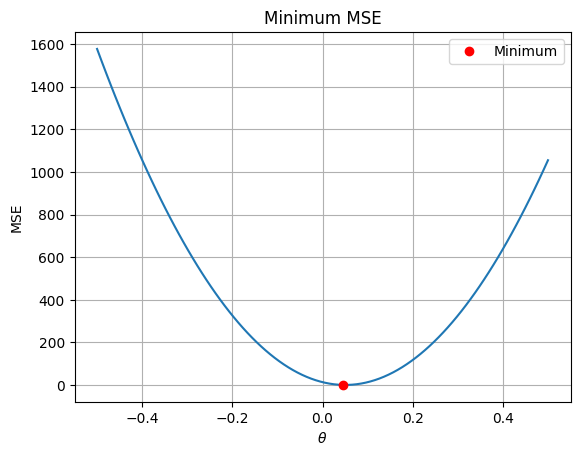

In [62]:
#Code for Plot
plt.plot(thetas, mses)
plt.plot(thetas[np.argmin(mses)], min(mses), 'ro', label = 'Minimum')
plt.legend()
plt.title('Minimum MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.grid();
#plt.savefig('images/mse_min.png')